# Initial EDA of Reddit Parking Searches of LA Parking Reg Dataset

Michael Gonzalez

This is another EDA on the Reddit searches, but it is done on the Los Angeles Parking Regulations dataset.  I did a preliminary search in the original json file. I serched for any terms that came to mind that were parking related. I followed this with the n-gram method, also known as the bi and tri grams methods that was used in the last EDA. I have selected four terms for this EDA, which are Parking, Enforcement, Meter and Limit.

# Loading libraries and setting the directory

In [1]:
# Import libraries and set directory
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import os
from typing import Union
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

PROJECT_DIR = Path(os.path.abspath('')).resolve().parents[0]

In [2]:
# Download NLTK libaries
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelgonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelgonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelgonzalez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Looking at the raw data

In [3]:
# Making the path of the raw data readable for All los_angeles_parking.
la_pk_reg = pd.read_json(PROJECT_DIR / 'data/raw/LOSANGELESparking_regulation.json')

# Displaying 
la_pk_reg.head()

,title,permalink,selftext,upvote_ratio,url,votes
0,City of West Hollywood Suspends Permit Parking...,/r/LosAngeles/comments/fjulrj/city_of_west_hol...,,0.99,https://www.weho.org/Home/Components/News/News...,1051
1,City of West Hollywood to Begin Enforcing Prev...,/r/LosAngeles/comments/gzv1b1/city_of_west_hol...,,0.90,https://www.weho.org/city-government/city-depa...,28
2,Valet parking regulations to be considered by ...,/r/LosAngeles/comments/13epqd/valet_parking_re...,,0.95,http://www.latimes.com/news/local/la-me-valet-...,16
3,Covid-19 Megathread: Stage 2 progress with ret...,/r/LosAngeles/comments/grk92f/covid19_megathre...,*New and significant information is numbered a...,0.91,https://www.reddit.com/r/LosAngeles/comments/g...,90
4,Covid-19 Megathread: County sets July 4th goal...,/r/LosAngeles/comments/gomkkw/covid19_megathre...,*New and significant information is numbered a...,0.96,https://www.reddit.com/r/LosAngeles/comments/g...,77


# The Bi and Tri Grams Method (n-gram method)

# Creating a list of bi-grams and tri-grams

In [4]:
# Function that creates list of bi-grams or tri-grams.
def create_grams(input_file: Union[str, Path], gram: str = 'bi') -> list: 
    
    # Reading the file into a data frame.
    df = pd.read_json(input_file)

    # Combine the title and self_text of dataframe.
    df['title_selftext'] = df['title'] + df['selftext']

    # Change all words into lowercase.
    df['title_selftext'] = df['title_selftext'].apply(lambda x: x.lower())

    # Tokenize the data frame.
    df['tokens'] = df.title_selftext.apply(lambda x: 
            nltk.RegexpTokenizer(r'\w+').tokenize(x))

    # Removing stop words and lemmatize using WordNetLemmatizer.
    wnl = WordNetLemmatizer()
    df['tokens'] = df['tokens'].apply(lambda x: [wnl.lemmatize(w) 
            for w in x if not w in stop_words])

    # Apply bigram, trigram, or error.
    if gram =='bi':
        df['grams'] = df['tokens'].apply(nltk.bigrams)
    elif gram =='tri':
        df['grams'] = df['tokens'].apply(nltk.trigrams)
    else:
        raise NameError('Only bi or tri allowed')

    # Return combined list of bi-grams.
    return [' '.join(item) for sublist in df.grams for item in sublist]

# Result of bi-grams for Parking search term

In [5]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('parking')].value_counts()
biggram_counts[:10]

angeles parking        94
parking enforcement    92
parking lot            87
parking regulation     34
relaxed parking        27
parking fine           23
parking ticket         22
parking garage         22
parking spot           19
parking restriction    19
dtype: int64

# Result of tri-grams for Parking search term

In [6]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('parking')].value_counts()
trigram_counts[:10]

los angeles parking              94
angeles parking lot              24
angeles parking enforcement      20
relaxed parking enforcement      19
parking enforcement http         19
relaxes parking enforcement      13
parking lot november             13
west hollywood parking           12
vehicle overnight parking        12
preferential parking district    12
dtype: int64

# Data Visualizations for Parking search term

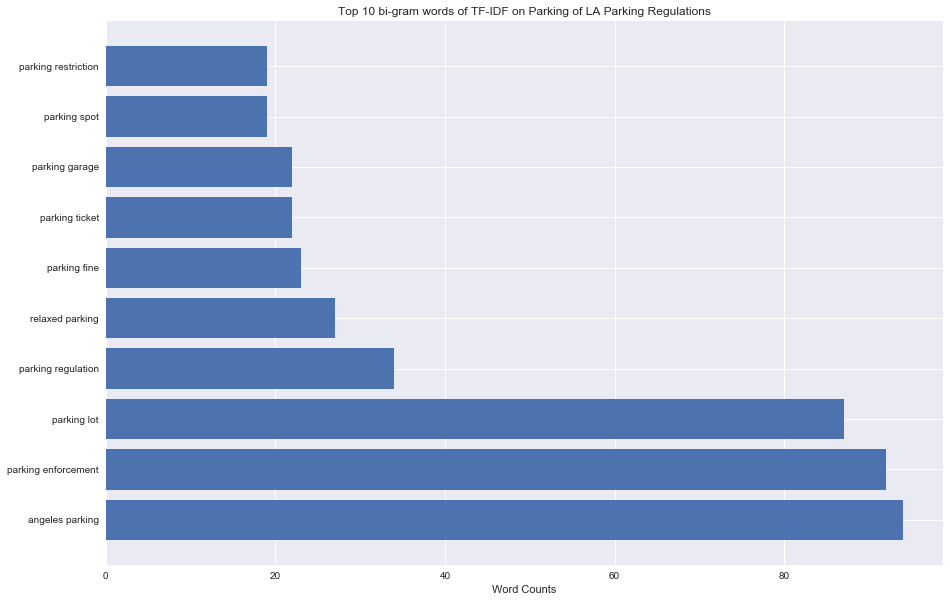

In [7]:
# Displaying a matplotlib bar chart from bi-grams word counts for parking.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Parking of LA Parking Regulations')
plt.show()

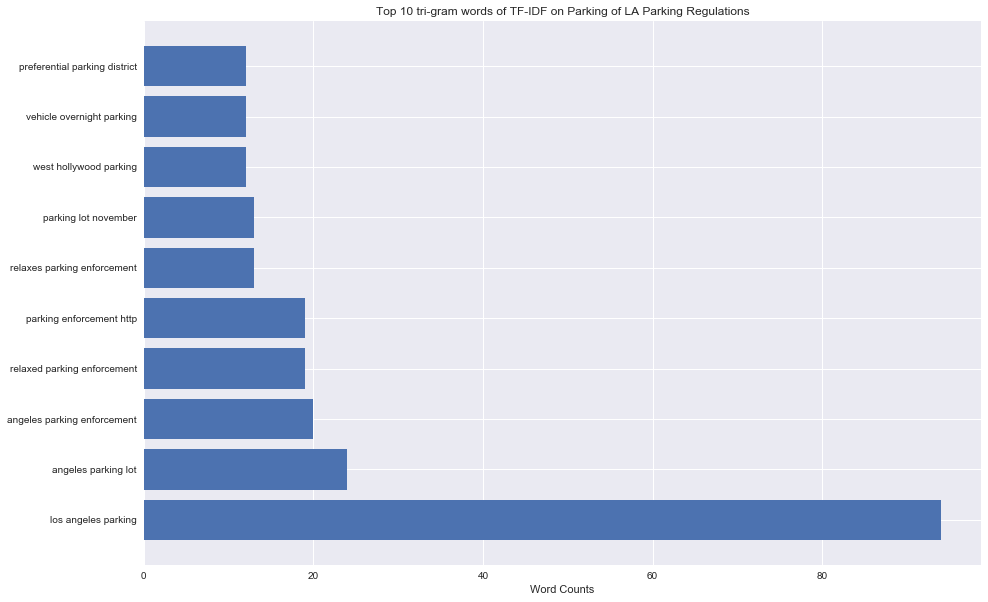

In [8]:
# Displaying a matplotlib bar chart from tri-grams word counts for parking.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Parking of LA Parking Regulations')
plt.show()

# Result of bi-grams for Enforcement search term

In [9]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('enforcement')].value_counts()
biggram_counts[:10]

parking enforcement       92
relaxed enforcement       39
enforcement http          19
law enforcement           15
enforcement street        11
enforcement place         11
enforcement across        11
enforcement around        11
enforcement maintained    11
extension enforcement     11
dtype: int64

# Result of tri-grams for Enforcement search term

In [10]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('enforcement')].value_counts()
trigram_counts[:10]

angeles parking enforcement         20
relaxed parking enforcement         19
parking enforcement http            19
enforcement http www                19
relaxes parking enforcement         13
relaxed enforcement around          11
1 relaxed enforcement               11
enforcement maintained operation    11
parking enforcement across          11
extension enforcement maintained    11
dtype: int64

# Data Visualizations for Enforcement search term

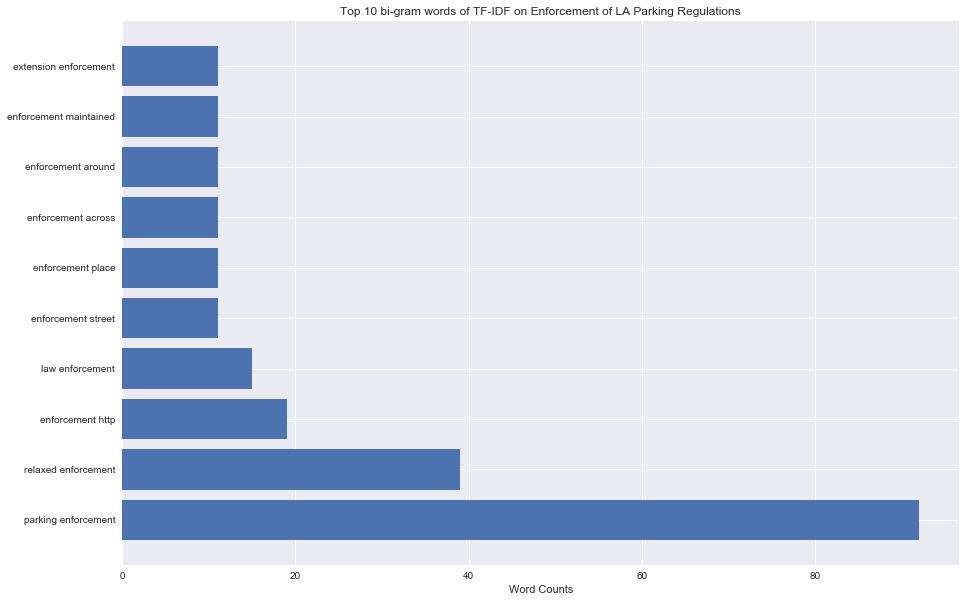

In [11]:
# Displaying a matplotlib bar chart from bi-grams word counts for enforcement.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Enforcement of LA Parking Regulations')
plt.show()

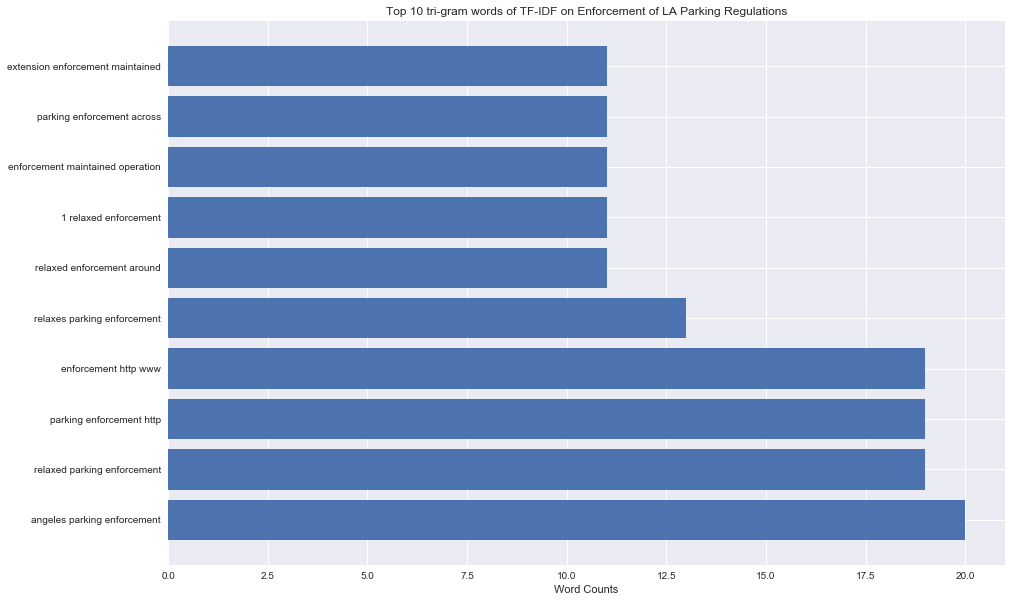

In [12]:
# Displaying a matplotlib bar chart from tri-grams word counts for enforcement.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Enforcement of LA Parking Regulations')
plt.show()

# Result of bi-grams for Meter search term

In [13]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('meter')].value_counts()
biggram_counts[:10]

parking meter        14
metered space        12
continue metered     12
meter parking         9
park meter            7
meter amount          6
meter apart           2
two meter             2
right barometer       2
barometer project     2
dtype: int64

# Result of tri-grams for Meter search term

In [14]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('meter')].value_counts()
trigram_counts[:10]

continue metered space     12
metered space encourage    11
also continue metered      11
parking meter parking       9
meter parking specified     8
limit parking meter         8
park meter amount           6
meter amount time           6
tomorrow park meter         3
monday park meter           3
dtype: int64

# Data Visualizations for Meter search term

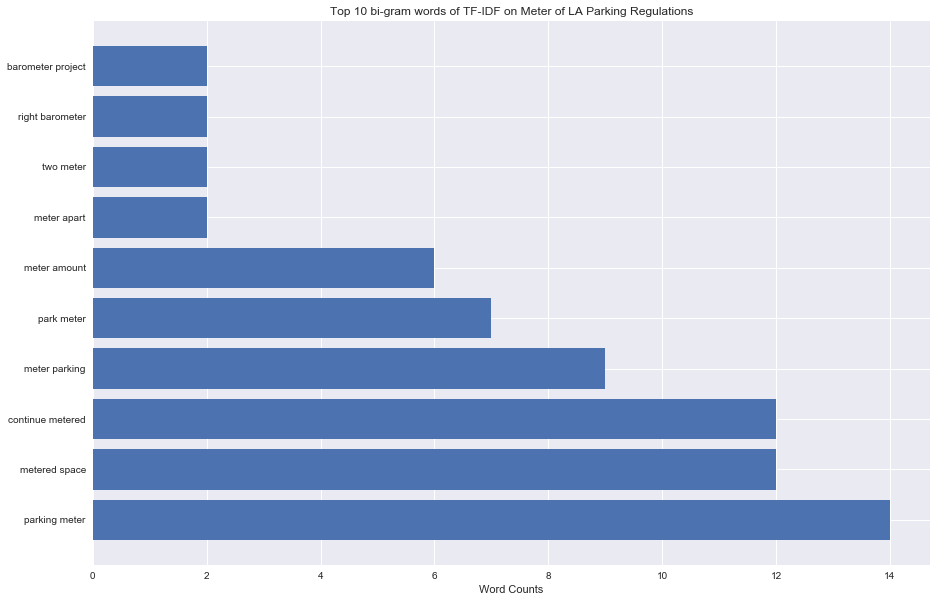

In [15]:
# Displaying a matplotlib bar chart from bi-grams word counts for meter.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Meter of LA Parking Regulations')
plt.show()

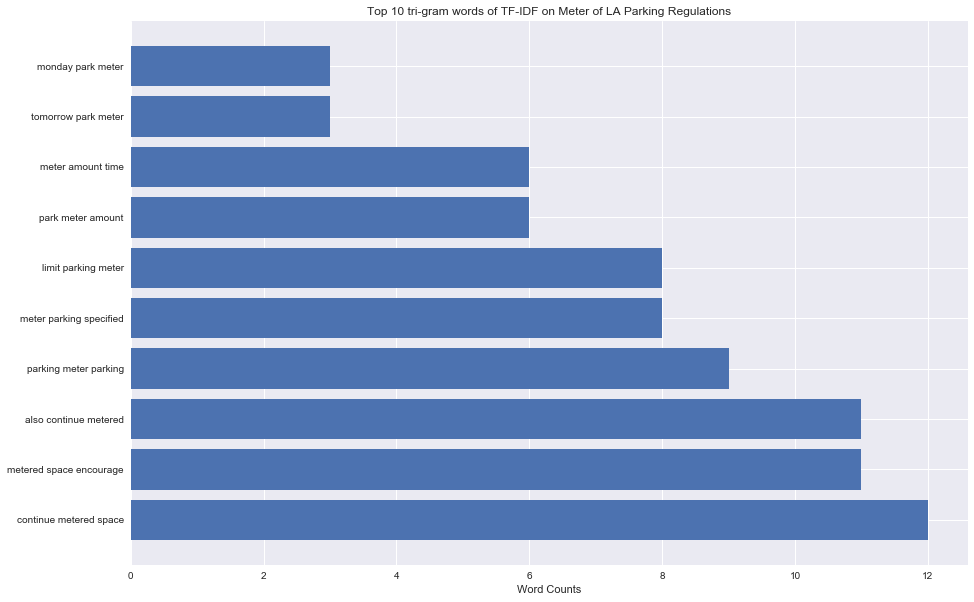

In [16]:
# Displaying a matplotlib bar chart from tri-grams word counts for meter.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Meter of LA Parking Regulations')
plt.show()

# Result of bi-grams for Limit search term

In [17]:
# Applying create_grams to all raw data and count bi-grams.
bigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    bigram_list = bigram_list + create_grams(path)
    combined_bigrams = pd.Series(bigram_list)
biggram_counts = combined_bigrams[combined_bigrams.str.contains('limit')].value_counts()
biggram_counts[:10]

time limit             23
limiting restaurant    16
shut limiting          16
limit amount           14
limit toilet           10
imposed limit          10
offering limited        9
limit parking           8
limited testing         8
limited los             6
dtype: int64

# Result of tri-grams for Limit search term

In [18]:
# Applying create_grams to all raw data and count tri-grams.
trigram_list = []
for path in (PROJECT_DIR / 'data' / 'raw').glob("*.json"):
    trigram_list = trigram_list + create_grams(path, gram = 'tri')
    combined_trigram = pd.Series(trigram_list)
trigram_counts = combined_trigram[combined_trigram.str.contains('limit')].value_counts()
trigram_counts[:10]

center shut limiting        16
shut limiting restaurant    16
limiting restaurant take    16
limit toilet paper          10
imposed limit toilet        10
store imposed limit         10
city offering limited        8
offering limited testing     8
posted time limit            8
time limit parking           8
dtype: int64

# Data Visualizations for Limit search term

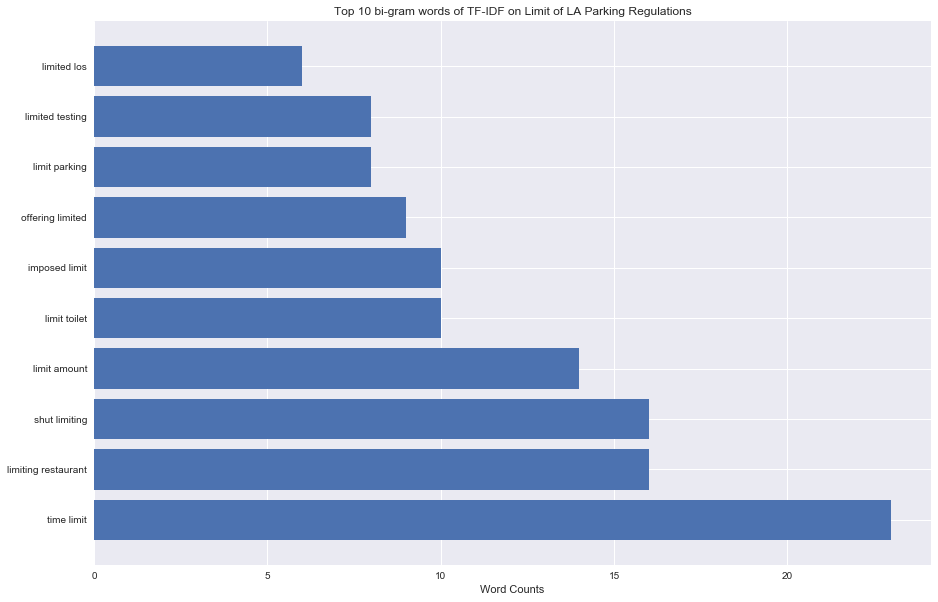

In [19]:
# Displaying a matplotlib bar chart from bi-grams word counts for meter.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(biggram_counts[ : 10].index, biggram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 bi-gram words of TF-IDF on Limit of LA Parking Regulations')
plt.show()

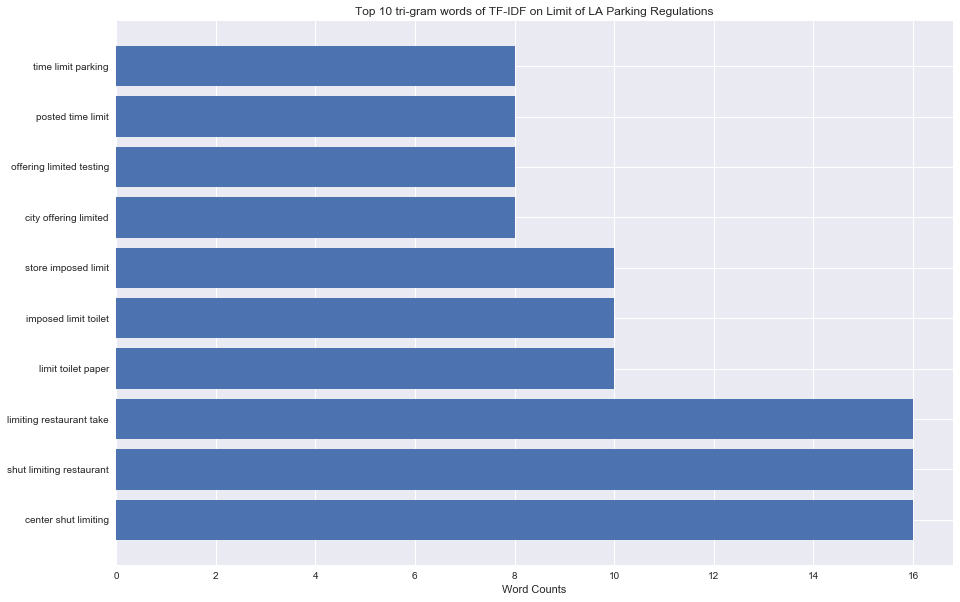

In [20]:
# Displaying a matplotlib bar chart from tri-grams word counts for meter.
plt.figure(figsize = (15, 10))
plt.style.use('seaborn')
plt.barh(trigram_counts[ : 10].index, trigram_counts[ : 10].values)
plt.xlabel('Word Counts')
plt.title('Top 10 tri-gram words of TF-IDF on Limit of LA Parking Regulations')
plt.show()